# Train a online portfolio

In [1]:
import jax.numpy as jnp
import jax
import optax

from pyfoliopt.loss import neg_log_dot

In [2]:
key = jax.random.PRNGKey(42)
T = 10000
N = 2


historical_prices = jnp.exp(jax.random.normal(key, (T, N)) * 1e-2)
historical_prices

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Array([[1.0126241 , 0.98783064],
       [0.9824612 , 1.0126845 ],
       [1.0037366 , 0.9968964 ],
       ...,
       [1.0073007 , 0.9971457 ],
       [1.0037684 , 0.99089557],
       [1.0116588 , 1.0147923 ]], dtype=float32)

In [3]:
start_learning_rate = 1
params = jnp.ones(N) / N

In [4]:
from pyfoliopt.optimizer import egd

In [5]:
# Create the mirror descent optimizer
optimizer = egd(start_learning_rate)
opt_state = optimizer.init(params)

# Optimization loop (simplified)
@jax.jit
def step(params, historical_price, opt_state):
    value = jnp.dot(historical_price, params)
    grads = jax.grad(neg_log_dot, argnums=1)(historical_price, params)
    updates, opt_state = optimizer.update(grads, opt_state, params)
    params = optax.apply_updates(params, updates)
    params = params / jnp.sum(params) # Avoid numerical instability
    return params, opt_state, value


values = []
for i in range(T):
    params, opt_state, value = step(params, historical_prices[i], opt_state)
    values.append(value)
    print("Optimized params:", params)
    print("Sum of weights: ", jnp.sum(params, axis=-1))

Optimized params: [0.5061967  0.49380335]
Sum of weights:  1.0
Optimized params: [0.49862134 0.50137866]
Sum of weights:  1.0
Optimized params: [0.50033087 0.49966913]
Sum of weights:  1.0
Optimized params: [0.50377303 0.496227  ]
Sum of weights:  1.0
Optimized params: [0.50507677 0.49492326]
Sum of weights:  1.0
Optimized params: [0.5057728  0.49422714]
Sum of weights:  1.0
Optimized params: [0.51284593 0.48715404]
Sum of weights:  1.0
Optimized params: [0.5144059  0.48559412]
Sum of weights:  1.0
Optimized params: [0.51119375 0.48880625]
Sum of weights:  1.0
Optimized params: [0.5110118  0.48898825]
Sum of weights:  1.0
Optimized params: [0.5095437 0.4904563]
Sum of weights:  1.0
Optimized params: [0.49856818 0.5014318 ]
Sum of weights:  1.0
Optimized params: [0.49911815 0.50088185]
Sum of weights:  1.0
Optimized params: [0.49686286 0.5031372 ]
Sum of weights:  1.0
Optimized params: [0.49273983 0.50726014]
Sum of weights:  1.0
Optimized params: [0.49448386 0.5055161 ]
Sum of weights:

In [6]:
historical_prices[i]

Array([1.0116588, 1.0147923], dtype=float32)

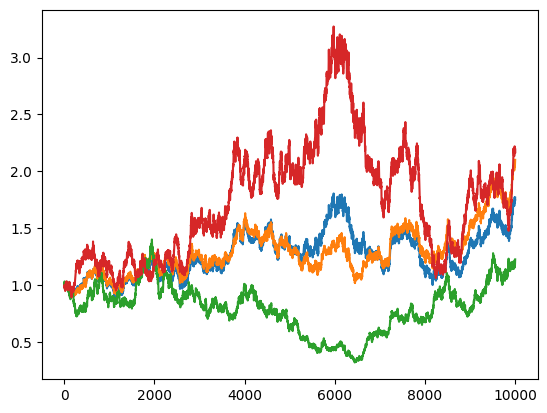

In [7]:
import matplotlib.pyplot as plt

returns = jnp.concat([jnp.array(values).reshape(-1, 1), historical_prices.mean(axis=-1, keepdims=True),  historical_prices], axis=-1)
plt.plot(returns.cumprod(axis=0))